In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Exploratory Data Analysis and Data Understanding**


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
df = pd.read_csv("/content/drive/MyDrive/Assessment/alzheimers_disease_data.csv")


# **Conducting Exploratory Data Analysis (EDA):**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [ ]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [ ]:
print(df.columns)


Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')


In [ ]:
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
print(df.isnull().sum())

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

In [ ]:
non_numeric_cols = df.select_dtypes(include=['object']).columns
print("Non-Numeric Columns:", non_numeric_cols)



Non-Numeric Columns: Index(['DoctorInCharge'], dtype='object')


In [ ]:
df_numeric = df.drop(columns=["PatientID", "DoctorInCharge"])

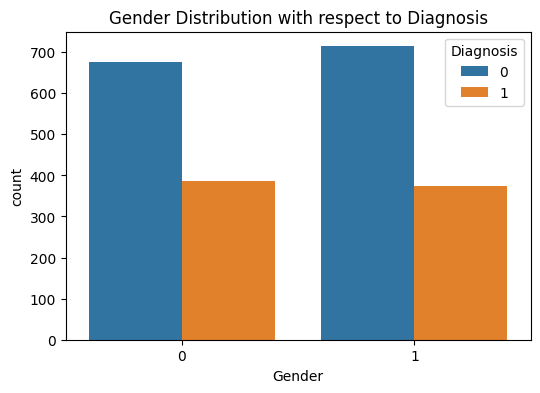

In [ ]:
# Countplot for 'Gender' and 'Diagnosis'
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', hue='Diagnosis', data=df)
plt.title("Gender Distribution with respect to Diagnosis")
plt.show()


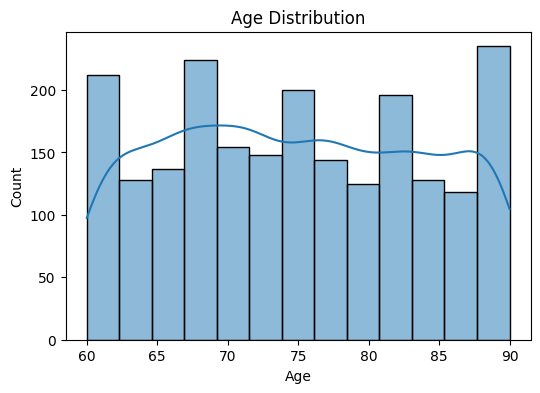

In [ ]:
# Visualize the distribution of 'Age'
plt.figure(figsize=(6, 4))
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.show()


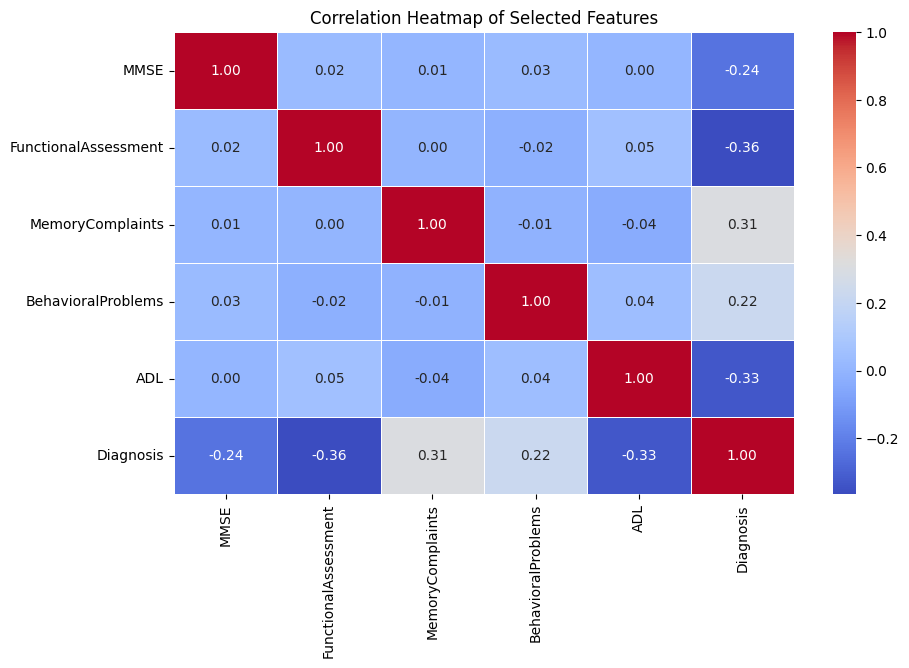

In [ ]:
corr_matrix = df_numeric.corr()

# Select features with significant correlation with the target (Diagnosis)
target_corr = corr_matrix["Diagnosis"].abs()
selected_features = target_corr[target_corr > 0.1].index.tolist()

# Filter dataframe with selected features
df_selected = df_numeric[selected_features]

# Plot heatmap for selected features
plt.figure(figsize=(10, 6))
sns.heatmap(df_selected.corr(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Selected Features")
plt.show()

In [ ]:
X = df_selected.drop(columns=["Diagnosis"])
y = df_selected["Diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("EDA & Data Preprocessing Completed!")


EDA & Data Preprocessing Completed!


# **Build a Model from Scratch**

In [ ]:
num_classes = len(y_train.unique())
print("Number of classes:", num_classes)


Number of classes: 2


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def initialize_weights(n_features):
    weights = np.zeros(n_features)
    bias = 0
    return weights, bias
def compute_loss(y, y_pred):
    m = len(y)
    loss = -(1/m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return loss

def compute_gradients(X, y, y_pred):
    m = len(y)
    dw = (1/m) * np.dot(X.T, (y_pred - y))
    db = (1/m) * np.sum(y_pred - y)
    return dw, db

def update_weights(weights, bias, dw, db, learning_rate):
    weights -= learning_rate * dw
    bias -= learning_rate * db
    return weights, bias

def train_logistic_regression(X, y, learning_rate=0.01, epochs=1000):
    n_features = X.shape[1]
    weights, bias = initialize_weights(n_features)

    for epoch in range(epochs):
        # Forward pass
        z = np.dot(X, weights) + bias
        y_pred = sigmoid(z)

        # Compute loss
        loss = compute_loss(y, y_pred)

        # Compute gradients
        dw, db = compute_gradients(X, y, y_pred)

        # Update parameters
        weights, bias = update_weights(weights, bias, dw, db, learning_rate)

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

    return weights, bias

weights, bias = train_logistic_regression(X_train, y_train, learning_rate=0.01, epochs=1000)

def predict(X, weights, bias, threshold=0.5):
    z = np.dot(X, weights) + bias
    probs = sigmoid(z)
    return (probs >= threshold).astype(int)

y_train_pred = predict(X_train, weights, bias)
y_test_pred = predict(X_test, weights, bias)

def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC-ROC: {auc:.4f}")


print("Train Set Performance:")
evaluate_model(y_train, y_train_pred)

print("\nTest Set Performance:")
evaluate_model(y_test, y_test_pred)


Epoch 0, Loss: 0.6931
Epoch 100, Loss: 0.5971
Epoch 200, Loss: 0.5378
Epoch 300, Loss: 0.4992
Epoch 400, Loss: 0.4727
Epoch 500, Loss: 0.4537
Epoch 600, Loss: 0.4395
Epoch 700, Loss: 0.4286
Epoch 800, Loss: 0.4201
Epoch 900, Loss: 0.4133
Train Set Performance:
Accuracy: 0.8517
Precision: 0.8121
Recall: 0.7545
F1 Score: 0.7822
AUC-ROC: 0.8296

Test Set Performance:
Accuracy: 0.8302
Precision: 0.7857
Recall: 0.7190
F1 Score: 0.7509
AUC-ROC: 0.8053


# **Build a Primary Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)

    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC-ROC: {auc:.4f}")

evaluate_model(y_test, y_pred_rf, "Random Forest")



Random Forest Performance:
Accuracy: 0.9535
Precision: 0.9650
Recall: 0.9020
F1 Score: 0.9324
AUC-ROC: 0.9420


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN model (try k=5 initially)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors (KNN)")



K-Nearest Neighbors (KNN) Performance:
Accuracy: 0.9163
Precision: 0.8980
Recall: 0.8627
F1 Score: 0.8800
AUC-ROC: 0.9043


# **Hyper-parameter Optimization with Cross-Validation**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameter grid (optimized)
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}

# Perform Grid Search with 5-fold cross-validation
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid,
                              cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
rf_grid_search.fit(X_train, y_train)

# Get the best parameters
best_rf_params = rf_grid_search.best_params_
print("Best Random Forest Parameters:", best_rf_params)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Random Forest Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Define hyperparameter grid (optimized)
knn_param_grid = {
    'n_neighbors': [5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Perform Grid Search with 5-fold cross-validation
knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid,
                               cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
knn_grid_search.fit(X_train, y_train)

# Get the best parameters
best_knn_params = knn_grid_search.best_params_
print("Best KNN Parameters:", best_knn_params)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}


# **Feature Selection**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Encode categorical columns using Label Encoding
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col])

# Ensure that the number of features you want to select (k) is not greater than the available features
k = min(10, X.shape[1])
# Apply SelectKBest with chi-square test
selector = SelectKBest(score_func=chi2, k=k)  # Selecting top k features
X_new = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

# Keep only selected features for model training
X_selected = X[selected_features]


Selected Features: Index(['MMSE', 'FunctionalAssessment', 'MemoryComplaints',
       'BehavioralProblems', 'ADL'],
      dtype='object')


# **Final Model**


Random Forest Performance:
Accuracy: 0.9558139534883721
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       277
           1       0.97      0.91      0.94       153

    accuracy                           0.96       430
   macro avg       0.96      0.95      0.95       430
weighted avg       0.96      0.96      0.96       430

AUC-ROC Score: 0.9452230952549491
Confusion Matrix:


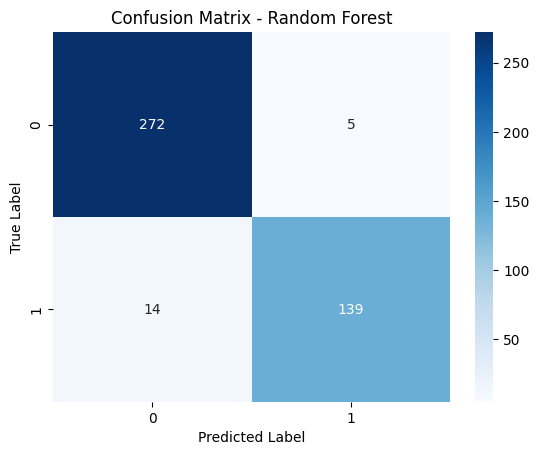


K-Nearest Neighbors Performance:
Accuracy: 0.9162790697674419
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       277
           1       0.90      0.86      0.88       153

    accuracy                           0.92       430
   macro avg       0.91      0.90      0.91       430
weighted avg       0.92      0.92      0.92       430

AUC-ROC Score: 0.9042967367452396
Confusion Matrix:


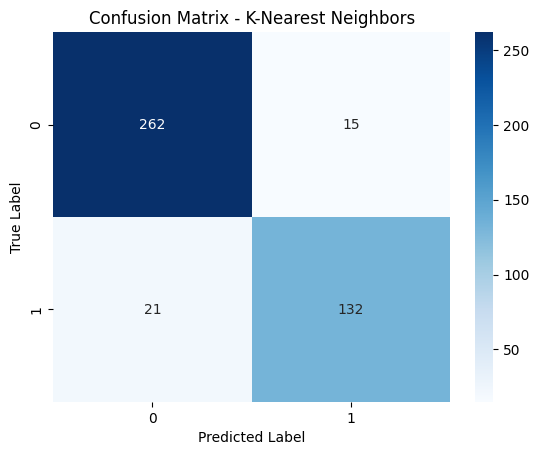

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Step 1: Prepare Data (Using Selected Features)
selected_features = ['MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL']
X_final = X[selected_features]
y_final = y  # Target variable

# Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_final)

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_final, test_size=0.2, random_state=42)

# Step 2: Train Final Models (Using Optimal Hyperparameters)
rf_model = RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                                  min_samples_split=2, n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

knn_model = KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')
knn_model.fit(X_train, y_train)

# Step 3: Make Predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)

# Step 4: Evaluate Models
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} Performance:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("AUC-ROC Score:", roc_auc_score(y_true, y_pred))
    print("Confusion Matrix:")
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors")